In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from squadds.core.utils import set_huggingface_api_key

set_huggingface_api_key()

API key already exists in .env file.


In [3]:
from datasets import get_dataset_config_names
from datasets import load_dataset
from squadds import SQuADDS_DB
from squadds.interpolations.physics import ScalingInterpolator
from squadds import Analyzer
from squadds import AnsysSimulator
import numpy as np

db = SQuADDS_DB()
configs = get_dataset_config_names("SQuADDS/SQuADDS_DB")

## Select system style (qubit + RR)

In [4]:
db.select_system(['qubit','cavity_claw'])
db.select_qubit('TransmonCross')
db.select_cavity_claw('RouteMeander')
db.select_coupler('CLT')
df = db.create_system_df()

analyzer = Analyzer(db)
analyzer.target_param_keys()
target_params = {
                    "qubit_frequency_GHz": 5.523,
                    "cavity_frequency_GHz": 7.815,
                    "kappa_kHz": 400,
                    "resonator_type":"quarter",
                    "anharmonicity_MHz": -200,
                    "g_MHz": 30}

results = analyzer.find_closest(target_params=target_params,
                                        num_top=3,
                                        metric="Euclidean",
                                        display=True)
interpolator = ScalingInterpolator(analyzer, target_params)
design_df = interpolator.get_design()
best_device = results.iloc[0]
simulator = AnsysSimulator(analyzer, best_device)
best_device_geometry = best_device['design_options']


 g:\Shared drives\CavityCooling\DARPA\Simulations\SQUADDS\SQuADDS\squadds\core\analysis.py: 274
 g:\Shared drives\CavityCooling\DARPA\Simulations\SQUADDS\SQuADDS\squadds\core\analysis.py: 274
 g:\Shared drives\CavityCooling\DARPA\Simulations\SQUADDS\SQuADDS\squadds\core\analysis.py: 274


Kappa scaling: 1.0331772769572103
g scaling: 0.9903907788621945
alpha scaling: 0.9941204623259026
selected system: ['qubit', 'cavity_claw']


In [7]:
design_options_dict_list

[{'cavity_options': {'coupling_type': 'CLT',
   'coupler_options': {'coupling_length': '207um',
    'coupling_space': '7.9um',
    'down_length': '50um',
    'open_termination': False,
    'orientation': '-90',
    'prime_gap': '5.1um',
    'prime_width': '11.7um',
    'second_gap': '5.1um',
    'second_width': '11.7um'},
   'cpw_options': {'left_options': {'fillet': '49.9um',
     'lead': {'start_straight': '100um', 'end_straight': '50um'},
     'meander': {'spacing': '100um'},
     'pin_inputs': {'start_pin': {'component': 'cplr', 'pin': 'second_end'},
      'end_pin': {'component': 'claw', 'pin': 'readout'}},
     'total_length': '3283.4947901527826um',
     'trace_gap': '5.1um',
     'trace_width': '11.7um'}}},
  'qubit_options': {'aedt_hfss_capacitance': 0,
   'aedt_hfss_inductance': 9.686e-09,
   'aedt_q3d_capacitance': 0,
   'aedt_q3d_inductance': 1e-08,
   'chip': 'main',
   'connection_pads': {'readout': {'claw_cpw_length': '40um',
     'claw_cpw_width': '10um',
     'claw_gap

Starting the Simulation


INFO 10:41AM [connect_project]: Connecting to Ansys Desktop API...
INFO 10:41AM [load_ansys_project]: 	Opened Ansys App
INFO 10:41AM [load_ansys_project]: 	Opened Ansys Desktop v2021.1.0
INFO 10:41AM [load_ansys_project]: 	Opened Ansys Project
	Folder:    D:/lfl/Documents/Ansoft/
	Project:   Project70
INFO 10:41AM [connect_design]: No active design found (or error getting active design).
INFO 10:41AM [connect]: 	 Connected to project "Project70". No design detected
INFO 10:41AM [connect_design]: 	Opened active design
	Design:    CavitySweep [Solution type: Eigenmode]
WARNING 10:41AM [connect_setup]: 	No design setup detected.
WARNING 10:41AM [connect_setup]: 	Creating eigenmode default setup.
INFO 10:41AM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.HfssEMSetup'>)


INFO 10:41AM [connect_design]: 	Opened active design
	Design:    CavitySweep_hfss [Solution type: Eigenmode]
WARNING 10:41AM [connect_setup]: 	No design setup detected.
WARNING 10:41AM [connect_setup]: 	Creating eigenmode default setup.
INFO 10:41AM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.HfssEMSetup'>)


creaing porst
Sim rendered into HFSS!
{'mesh1': {'objects': ['prime_cpw_cplr', 'second_cpw_cplr', 'trace_cpw', 'readout_connector_arm_claw'], 'MaxLength': '7um'}}
pyaedt INFO: using existing logger.


INFO:Global:using existing logger.


pyaedt INFO: Launching PyAEDT outside AEDT with CPython and PythonNET.


INFO:Global:Launching PyAEDT outside AEDT with CPython and PythonNET.


pyaedt INFO: AEDT installation Path D:\Program Files\AnsysEM\AnsysEM21.1\Win64.


INFO:Global:AEDT installation Path D:\Program Files\AnsysEM\AnsysEM21.1\Win64.


pyaedt INFO: Launching AEDT with module PythonNET.


INFO:Global:Launching AEDT with module PythonNET.


pyaedt WARNING: PyAEDT is not supported in AEDT versions earlier than 2021 R2. Trying to launch PyAEDT with PyWin32.


pyaedt INFO: pyaedt v0.6.46


INFO:Global:pyaedt v0.6.46


pyaedt INFO: Python version 3.11.4 | packaged by conda-forge | (main, Jun 10 2023, 17:59:51) [MSC v.1935 64 bit (AMD64)]


INFO:Global:Python version 3.11.4 | packaged by conda-forge | (main, Jun 10 2023, 17:59:51) [MSC v.1935 64 bit (AMD64)]


pyaedt INFO: Project Project70 set to active.


INFO:Global:Project Project70 set to active.


pyaedt INFO: Aedt Objects initialized


INFO:Global:Aedt Objects initialized


pyaedt INFO: Variable Manager initialized


INFO:Global:Variable Manager initialized


pyaedt INFO: Design Loaded


INFO:Global:Design Loaded


pyaedt INFO: Successfully loaded project materials !


INFO:Global:Successfully loaded project materials !


pyaedt INFO: Materials Loaded


INFO:Global:Materials Loaded


pyaedt INFO: Project files removed from handlers.


INFO:Global:Project files removed from handlers.
INFO 10:41AM [get_setup]: 	Opened setup `test_setup`  (<class 'pyEPR.ansys.HfssEMSetup'>)
INFO 10:41AM [analyze]: Analyzing setup test_setup
10:46AM 46s INFO [get_f_convergence]: Saved convergences to g:\Shared drives\CavityCooling\DARPA\Simulations\SQUADDS\SQuADDS\hfss_eig_f_convergence.csv


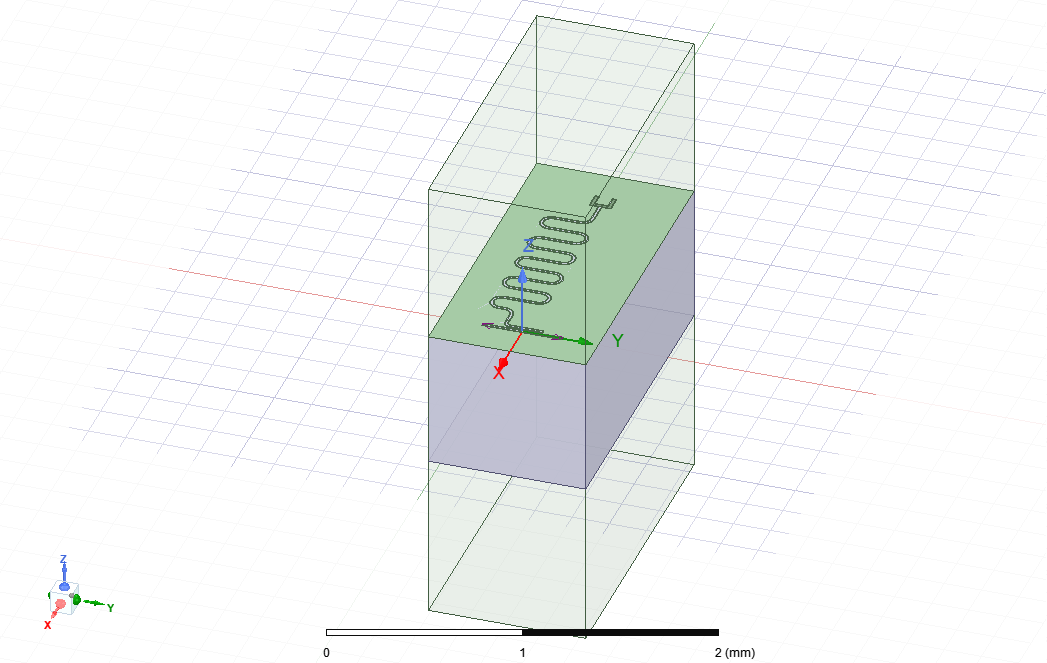

Design "CavitySweep_hfss" info:
	# eigenmodes    1
	# variations    1
Design "CavitySweep_hfss" info:
	# eigenmodes    1
	# variations    1
freq = 7.985 GHz
Q = 53344.1
kappa = 0.15 MHz
the parameters ['run'] are unsupported, so they have been ignored


INFO 10:46AM [connect_project]: Connecting to Ansys Desktop API...
INFO 10:46AM [load_ansys_project]: 	Opened Ansys App
INFO 10:46AM [load_ansys_project]: 	Opened Ansys Desktop v2021.1.0
INFO 10:46AM [load_ansys_project]: 	Opened Ansys Project
	Folder:    D:/lfl/Documents/Ansoft/
	Project:   Project70
INFO 10:46AM [connect_design]: 	Opened active design
	Design:    CavitySweep_hfss [Solution type: Eigenmode]
INFO 10:46AM [get_setup]: 	Opened setup `test_setup`  (<class 'pyEPR.ansys.HfssEMSetup'>)
INFO 10:46AM [connect]: 	Connected to project "Project70" and design "CavitySweep_hfss" 😀 

INFO 10:46AM [connect_design]: 	Opened active design
	Design:    LOMv2.0_q3d [Solution type: Q3D]
WARNING 10:46AM [connect_setup]: 	No design setup detected.
WARNING 10:46AM [connect_setup]: 	Creating Q3D default setup.
INFO 10:46AM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.AnsysQ3DSetup'>)
INFO 10:46AM [get_setup]: 	Opened setup `sweep_setup`  (<class 'pyEPR.ansys.AnsysQ3DSetup'>)


<COMObject GetModule>


INFO 10:46AM [analyze]: Analyzing setup sweep_setup
INFO 10:48AM [get_matrix]: Exporting matrix data to (C:\Users\lfl\AppData\Local\Temp\tmpqr29xyf9.txt, C, , sweep_setup:LastAdaptive, "Original", "ohm", "nH", "fF", "mSie", 5000000000, Maxwell, 1, False
INFO 10:48AM [get_matrix]: Exporting matrix data to (C:\Users\lfl\AppData\Local\Temp\tmp7g5pw86a.txt, C, , sweep_setup:AdaptivePass, "Original", "ohm", "nH", "fF", "mSie", 5000000000, Maxwell, 1, False
INFO 10:48AM [get_matrix]: Exporting matrix data to (C:\Users\lfl\AppData\Local\Temp\tmp8qekvvue.txt, C, , sweep_setup:AdaptivePass, "Original", "ohm", "nH", "fF", "mSie", 5000000000, Maxwell, 2, False
INFO 10:48AM [get_matrix]: Exporting matrix data to (C:\Users\lfl\AppData\Local\Temp\tmp6q19q49d.txt, C, , sweep_setup:AdaptivePass, "Original", "ohm", "nH", "fF", "mSie", 5000000000, Maxwell, 3, False
INFO 10:48AM [get_matrix]: Exporting matrix data to (C:\Users\lfl\AppData\Local\Temp\tmp1eswz42_.txt, C, , sweep_setup:AdaptivePass, "Origin

In [5]:

design_options_dict_list = []
simulated_params_list = []   
# ansys_results = simulator.simulate(best_device)
ansys_results = simulator.sweep_qubit_cavity(best_device)
design_options = ansys_results['design']['design_options']
sim_results = ansys_results['sim_results']
design_options_dict_list.append(design_options)
simulated_params_list.append(sim_results)


In [6]:
simulated_params_list

[{'cavity_frequency_GHz': 7985288069.860001,
  'Q': 53344.10521545587,
  'kappa_kHz': 149693.91721180003,
  'g_MHz': 26.360455332917876,
  'anharmonicity_MHz': -179.40518030876262,
  'qubit_frequency_GHz': 4.455237973191489}]